In [6]:
import pandas as pd
import numpy as np
import sqlite3
import missingno as msno

In [7]:
db_path = 'C:/Users/61411/personal-project/databases/basketball.sqlite'
connection = sqlite3.connect(db_path)

In [8]:
def sql_fetch(connection):
    cursorObj = connection.cursor()
    # select all tables in the database
    cursorObj.execute('SELECT name from sqlite_master where type= "table"')
    return cursorObj.fetchall()
list_of_tables = sql_fetch(connection)

In [9]:
len(list_of_tables)

16

In [10]:
list_of_tables

[('Player',),
 ('Team',),
 ('Team_Attributes',),
 ('Team_History',),
 ('Player_Attributes',),
 ('Game_Officials',),
 ('Game_Inactive_Players',),
 ('Team_Salary',),
 ('Player_Salary',),
 ('Draft',),
 ('Draft_Combine',),
 ('Player_Photos',),
 ('Player_Bios',),
 ('Game',),
 ('News',),
 ('News_Missing',)]

In [11]:
# save a table to pandas
player_df = pd.read_sql_query("SELECT * FROM Player", connection)

sql_vars = vars()
df_list = []
for table_name in list_of_tables:
    sql_vars[table_name[0]] = pd.read_sql_query(
                            f"SELECT * FROM {table_name[0]}", 
                            connection
                            )
    df_list.append(sql_vars[table_name[0]])


In [12]:
player_attributes_df = Player_Attributes
team_salary_df = Team_Salary
player_salary_df = Player_Salary
draft_df = Draft
draft_combine_df = Draft_Combine
games_df = Game

In [13]:
player_attributes_df.head()

,ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,PTS,AST,REB,ALL_STAR_APPEARANCES,PIE
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24T00:00:00,Duke,USA,...,Y,Y,1990,1,25,5.7,0.3,3.3,0.0,NaN
1,76002,Zaid,Abdul-Aziz,Zaid Abdul-Aziz,"Abdul-Aziz, Zaid",Z. Abdul-Aziz,zaid-abdul-aziz,1946-04-07T00:00:00,Iowa State,USA,...,Y,Y,1968,1,5,9.0,1.2,8.0,0.0,NaN
2,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16T00:00:00,UCLA,USA,...,Y,Y,1969,1,1,24.6,3.6,11.2,18.0,NaN
3,51,Mahmoud,Abdul-Rauf,Mahmoud Abdul-Rauf,"Abdul-Rauf, Mahmoud",M. Abdul-Rauf,mahmoud-abdul-rauf,1969-03-09T00:00:00,Louisiana State,USA,...,Y,Y,1990,1,3,14.6,3.5,1.9,0.0,NaN
4,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",T. Abdul-Wahad,tariq-abdul-wahad,1974-11-03T00:00:00,San Jose State,France,...,Y,Y,1997,1,11,7.8,1.1,3.3,0.0,NaN


In [14]:
player_attributes_df.columns

Index(['ID', 'FIRST_NAME', 'LAST_NAME', 'DISPLAY_FIRST_LAST',
       'DISPLAY_LAST_COMMA_FIRST', 'DISPLAY_FI_LAST', 'PLAYER_SLUG',
       'BIRTHDATE', 'SCHOOL', 'COUNTRY', 'LAST_AFFILIATION', 'HEIGHT',
       'WEIGHT', 'SEASON_EXP', 'JERSEY', 'POSITION', 'ROSTERSTATUS',
       'GAMES_PLAYED_CURRENT_SEASON_FLAG', 'TEAM_ID', 'TEAM_NAME',
       'TEAM_ABBREVIATION', 'TEAM_CODE', 'TEAM_CITY', 'PLAYERCODE',
       'FROM_YEAR', 'TO_YEAR', 'DLEAGUE_FLAG', 'NBA_FLAG', 'GAMES_PLAYED_FLAG',
       'DRAFT_YEAR', 'DRAFT_ROUND', 'DRAFT_NUMBER', 'PTS', 'AST', 'REB',
       'ALL_STAR_APPEARANCES', 'PIE'],
      dtype='object')

In [15]:
player_attributes_df.describe()

,HEIGHT,WEIGHT,SEASON_EXP,PTS,AST,REB,ALL_STAR_APPEARANCES,PIE
count,4403.000000,4399.000000,4500.000000,4485.000000,4485.000000,4193.000000,4056.000000,429.000000
mean,78.070634,211.146852,4.295556,6.357101,1.436299,2.981588,0.343195,0.084002
std,3.638698,27.075019,4.492292,4.925010,1.409078,2.288022,1.474006,0.088903
min,65.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.500000
25%,75.000000,190.000000,1.000000,2.800000,0.500000,1.400000,0.000000,0.067000
50%,78.000000,210.000000,3.000000,5.100000,1.000000,2.400000,0.000000,0.089000
75%,81.000000,230.000000,7.000000,8.600000,1.900000,4.000000,0.000000,0.112000
max,91.000000,360.000000,22.000000,31.800000,11.200000,22.900000,18.000000,0.211000


In [16]:
draft_df[draft_df.namePlayer == 'Reggie Williams']

,yearDraft,numberPickOverall,numberRound,numberRoundPick,namePlayer,slugTeam,nameOrganizationFrom,typeOrganizationFrom,idPlayer,idTeam,nameTeam,cityTeam,teamName,PLAYER_PROFILE_FLAG,slugOrganizationTypeFrom,locationOrganizationFrom
1940,1987.0,4.0,1.0,4.0,Reggie Williams,LAC,Georgetown,College/University,199.0,1.610613e+09,Los Angeles Clippers,Los Angeles,Clippers,1.0,COL,None


In [17]:
draft_combine_df.yearCombine.describe()

count    1395.000000
mean     2010.412186
std         6.114756
min      2001.000000
25%      2005.000000
50%      2010.000000
75%      2016.000000
max      2021.000000
Name: yearCombine, dtype: float64

In [18]:
draft_df[draft_df.idPlayer==199]

,yearDraft,numberPickOverall,numberRound,numberRoundPick,namePlayer,slugTeam,nameOrganizationFrom,typeOrganizationFrom,idPlayer,idTeam,nameTeam,cityTeam,teamName,PLAYER_PROFILE_FLAG,slugOrganizationTypeFrom,locationOrganizationFrom
1940,1987.0,4.0,1.0,4.0,Reggie Williams,LAC,Georgetown,College/University,199.0,1.610613e+09,Los Angeles Clippers,Los Angeles,Clippers,1.0,COL,None


In [19]:
draft_combine_df[draft_combine_df.idPlayer==199]

,yearCombine,idPlayer,nameFirst,nameLast,namePlayer,slugPosition,heightWOShoesInches,heightWOShoes,weightLBS,wingspanInches,...,setOffDribBreakRightCollege,setOffDribBreakLeftCollegeMade,setOffDribBreakLeftCollegeAttempted,setOffDribBreakLeftCollegePct,setOffDribTopKeyCollegeMade,setOffDribTopKeyCollegeAttempted,setOffDribTopKeyCollegePct,setOffDribBreakRightCollegeMade,setOffDribBreakRightCollegeAttempted,setOffDribBreakRightCollegePct
693,2009,199.0,Reggie,Williams,Reggie Williams,SG,75.25,6' 3.25'',199.0,81.25,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
combine_drafted = draft_df.merge(draft_combine_df, on='idPlayer', how='right')

In [21]:
combine_drafted

,yearDraft,numberPickOverall,numberRound,numberRoundPick,namePlayer_x,slugTeam,nameOrganizationFrom,typeOrganizationFrom,idPlayer,idTeam,...,setOffDribBreakRightCollege,setOffDribBreakLeftCollegeMade,setOffDribBreakLeftCollegeAttempted,setOffDribBreakLeftCollegePct,setOffDribTopKeyCollegeMade,setOffDribTopKeyCollegeAttempted,setOffDribTopKeyCollegePct,setOffDribBreakRightCollegeMade,setOffDribBreakRightCollegeAttempted,setOffDribBreakRightCollegePct
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2124.0,NaN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12019.0,NaN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12020.0,NaN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12131.0,NaN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000.0,27.0,1.0,27.0,Primoz Brezec,IND,KK Olimpija,Other Team/Club,2056.0,1.610613e+09,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,2020.0,35.0,2.0,5.0,Xavier Tillman,SAC,Michigan State,College/University,1630214.0,1.610613e+09,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629700.0,NaN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1630232.0,NaN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1393,2020.0,53.0,2.0,23.0,Cassius Winston,OKC,Michigan State,College/University,1630216.0,1.610613e+09,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
combine_drafted[~combine_drafted.setOnMoveCollegePct.isna()]

,yearDraft,numberPickOverall,numberRound,numberRoundPick,namePlayer_x,slugTeam,nameOrganizationFrom,typeOrganizationFrom,idPlayer,idTeam,...,setOffDribBreakRightCollege,setOffDribBreakLeftCollegeMade,setOffDribBreakLeftCollegeAttempted,setOffDribBreakLeftCollegePct,setOffDribTopKeyCollegeMade,setOffDribTopKeyCollegeAttempted,setOffDribTopKeyCollegePct,setOffDribBreakRightCollegeMade,setOffDribBreakRightCollegeAttempted,setOffDribBreakRightCollegePct
972,2014.0,51.0,2.0,21.0,Thanasis Antetokounmpo,NYK,Delaware 87ers,Other Team/Club,203648.0,1.610613e+09,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,2014.0,42.0,2.0,12.0,Nick Johnson,HOU,Arizona,College/University,203910.0,1.610613e+09,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1005,2014.0,58.0,2.0,28.0,Jordan McRae,SAS,Tennessee,College/University,203895.0,1.610613e+09,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203941.0,NaN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1626165.0,NaN,...,5-8,4.0,8.0,0.500000,6.0,8.0,0.750000,5.0,8.0,0.625000
1033,2015.0,36.0,2.0,6.0,Rakeem Christmas,MIN,Syracuse,College/University,1626176.0,1.610613e+09,...,2-8,5.0,8.0,0.625000,3.0,8.0,0.375000,2.0,8.0,0.250000
1034,2015.0,41.0,2.0,11.0,Pat Connaughton,BKN,Notre Dame,College/University,1626192.0,1.610613e+09,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1626188.0,NaN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1036,2015.0,56.0,2.0,26.0,Branden Dawson,NOP,Michigan State,College/University,1626183.0,1.610613e+09,...,4-8,5.0,8.0,0.625000,3.0,8.0,0.375000,4.0,8.0,0.500000
1038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1626187.0,NaN,...,6-8,4.0,8.0,0.500000,5.0,8.0,0.625000,6.0,8.0,0.750000


<AxesSubplot:>

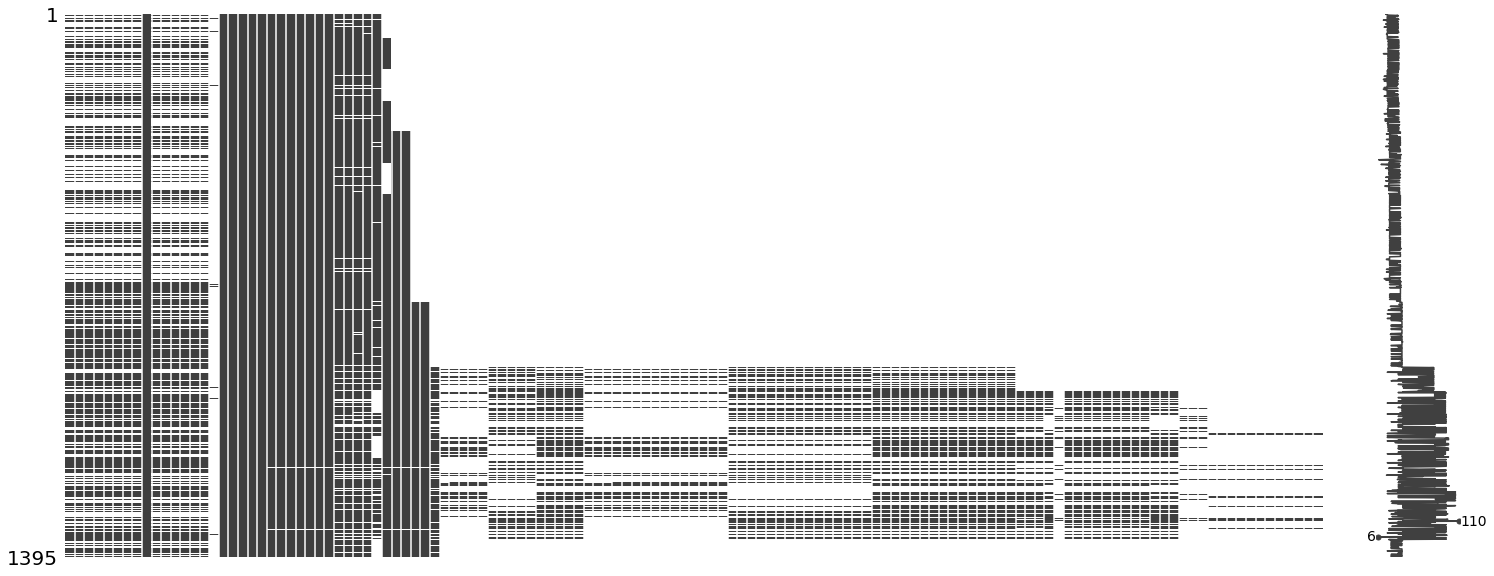

In [23]:
msno.matrix(combine_drafted)

In [24]:
# drop columns with set in the names
combine_drafted = combine_drafted[combine_drafted.columns.drop(list(combine_drafted.filter(regex='set')))]

In [25]:
combine_drafted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1394
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   yearDraft                    809 non-null    float64
 1   numberPickOverall            809 non-null    float64
 2   numberRound                  809 non-null    float64
 3   numberRoundPick              809 non-null    float64
 4   namePlayer_x                 809 non-null    object 
 5   slugTeam                     809 non-null    object 
 6   nameOrganizationFrom         808 non-null    object 
 7   typeOrganizationFrom         808 non-null    object 
 8   idPlayer                     1395 non-null   float64
 9   idTeam                       809 non-null    float64
 10  nameTeam                     809 non-null    object 
 11  cityTeam                     809 non-null    object 
 12  teamName                     809 non-null    object 
 13  PLAYER_PROFILE_FLA

In [26]:
combine_drafted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1394
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   yearDraft                    809 non-null    float64
 1   numberPickOverall            809 non-null    float64
 2   numberRound                  809 non-null    float64
 3   numberRoundPick              809 non-null    float64
 4   namePlayer_x                 809 non-null    object 
 5   slugTeam                     809 non-null    object 
 6   nameOrganizationFrom         808 non-null    object 
 7   typeOrganizationFrom         808 non-null    object 
 8   idPlayer                     1395 non-null   float64
 9   idTeam                       809 non-null    float64
 10  nameTeam                     809 non-null    object 
 11  cityTeam                     809 non-null    object 
 12  teamName                     809 non-null    object 
 13  PLAYER_PROFILE_FLA

<AxesSubplot:>

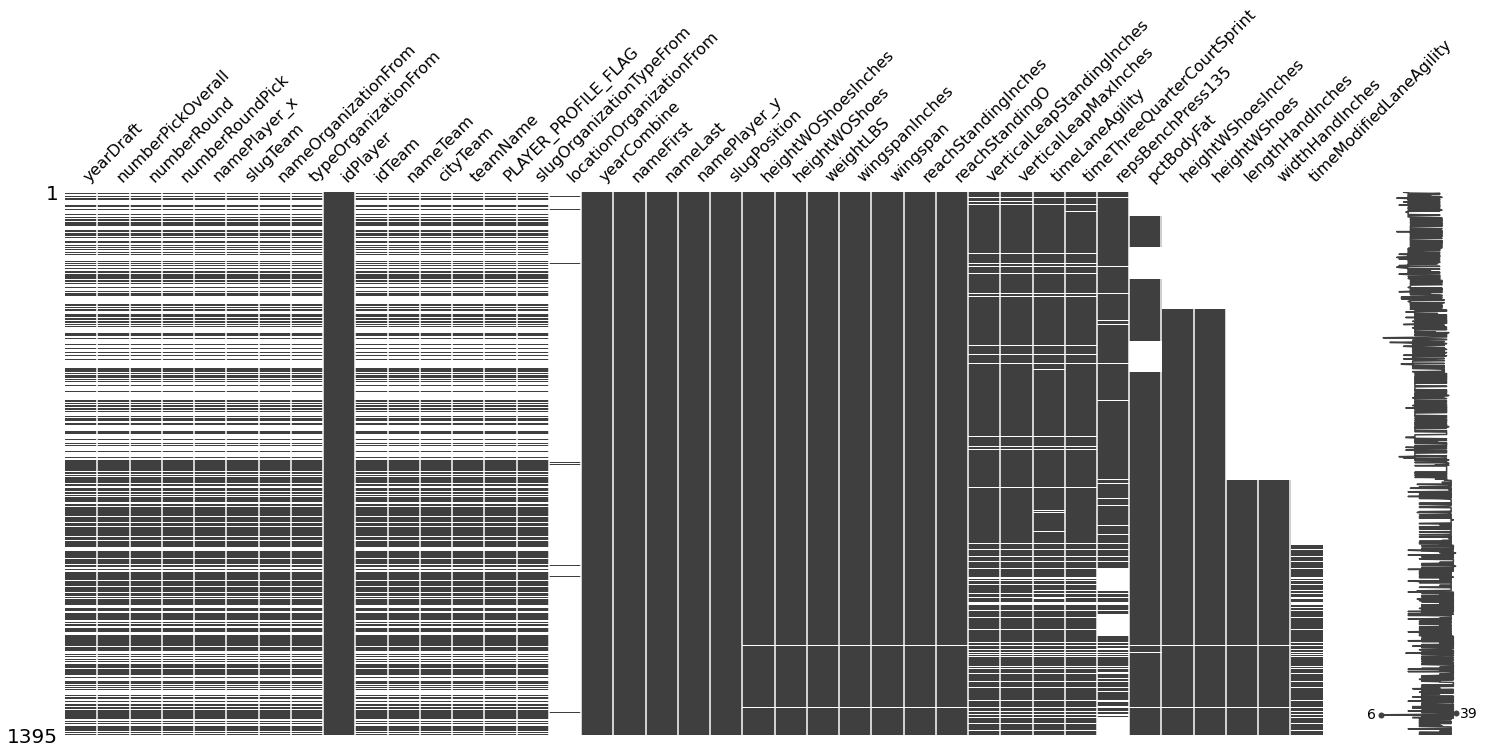

In [27]:
msno.matrix(combine_drafted)

In [28]:
combine_drafted = combine_drafted[combine_drafted.columns.drop(list(combine_drafted.filter(regex='location')))]

In [29]:
cols_to_drop = ['heightWShoesInches', 'heightWShoes']
combine_drafted.drop(cols_to_drop, axis=1, inplace=True)

<AxesSubplot:>

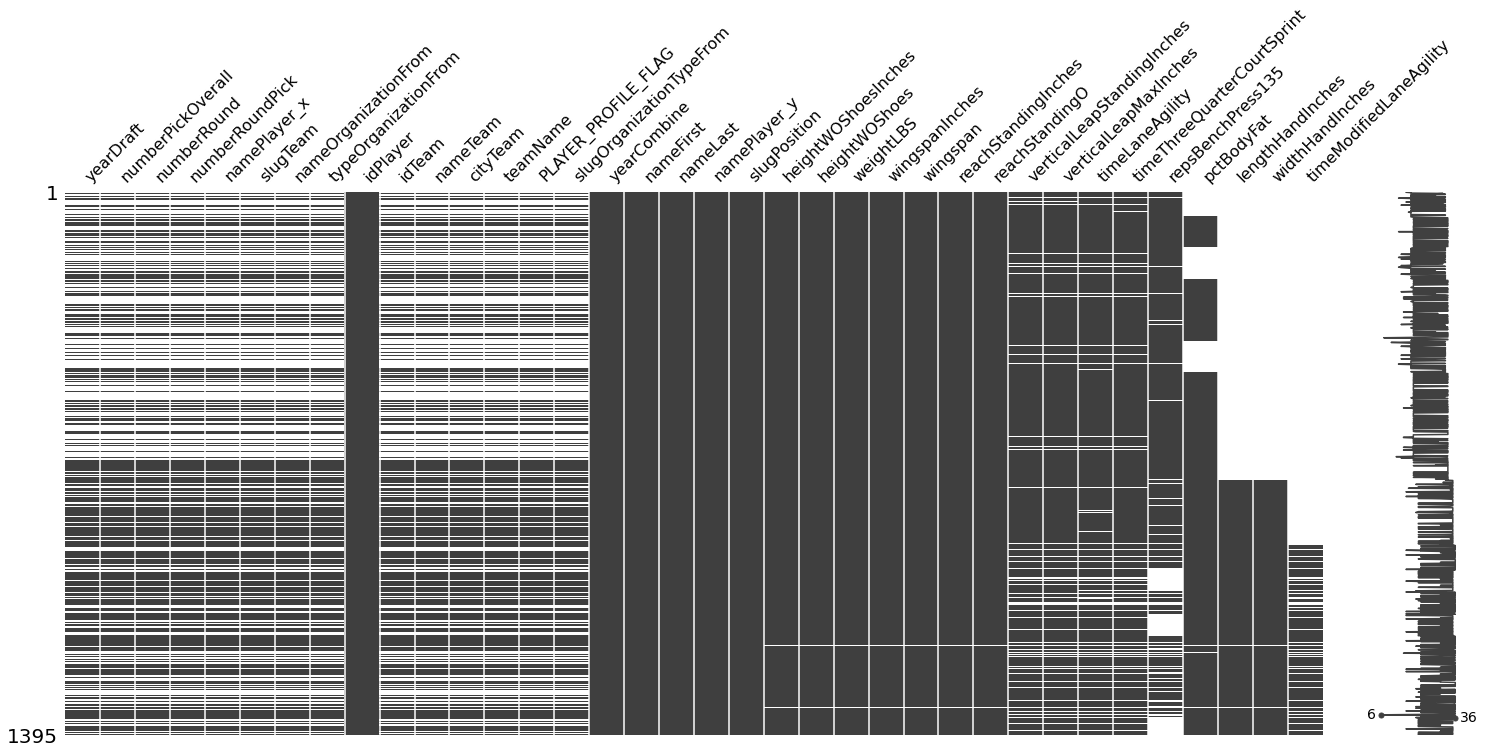

In [30]:
msno.matrix(combine_drafted)

In [31]:
combine_drafted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1394
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   yearDraft                    809 non-null    float64
 1   numberPickOverall            809 non-null    float64
 2   numberRound                  809 non-null    float64
 3   numberRoundPick              809 non-null    float64
 4   namePlayer_x                 809 non-null    object 
 5   slugTeam                     809 non-null    object 
 6   nameOrganizationFrom         808 non-null    object 
 7   typeOrganizationFrom         808 non-null    object 
 8   idPlayer                     1395 non-null   float64
 9   idTeam                       809 non-null    float64
 10  nameTeam                     809 non-null    object 
 11  cityTeam                     809 non-null    object 
 12  teamName                     809 non-null    object 
 13  PLAYER_PROFILE_FLA

In [32]:
pd.set_option('display.max_columns', None)

In [33]:
combine_drafted.head()

,yearDraft,numberPickOverall,numberRound,numberRoundPick,namePlayer_x,slugTeam,nameOrganizationFrom,typeOrganizationFrom,idPlayer,idTeam,nameTeam,cityTeam,teamName,PLAYER_PROFILE_FLAG,slugOrganizationTypeFrom,yearCombine,nameFirst,nameLast,namePlayer_y,slugPosition,heightWOShoesInches,heightWOShoes,weightLBS,wingspanInches,wingspan,reachStandingInches,reachStandingO,verticalLeapStandingInches,verticalLeapMaxInches,timeLaneAgility,timeThreeQuarterCourtSprint,repsBenchPress135,pctBodyFat,lengthHandInches,widthHandInches,timeModifiedLaneAgility
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2124.0,NaN,NaN,NaN,NaN,NaN,NaN,2001,Malik,Allen,Malik Allen,PF-C,80.25,6' 8.25'',271.0,86.5,7' 2.5'',109.0,9' 1'',25.5,29.0,11.83,3.38,13.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12019.0,NaN,NaN,NaN,NaN,NaN,NaN,2001,Harold,Arceneaux,Harold Arceneaux,SG-SF,76.50,6' 4.5'',219.0,80.5,6' 8.5'',103.0,8' 7'',NaN,29.0,13.80,NaN,0.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12020.0,NaN,NaN,NaN,NaN,NaN,NaN,2001,Lamont,Barnes,Lamont Barnes,PF-C,80.50,6' 8.5'',235.5,87.5,7' 3.5'',108.0,9' 0'',28.0,29.5,12.30,3.40,10.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12131.0,NaN,NaN,NaN,NaN,NaN,NaN,2001,Mario,Bland,Mario Bland,PF,77.50,6' 5.5'',287.0,84.0,7' 0'',103.0,8' 7'',27.0,31.0,13.04,3.47,15.0,NaN,NaN,NaN,NaN
4,2000.0,27.0,1.0,27.0,Primoz Brezec,IND,KK Olimpija,Other Team/Club,2056.0,1.610613e+09,Indiana Pacers,Indiana,Pacers,1.0,PRO,2001,Primoz,Brezec,Primoz Brezec,C,84.75,7' 0.75'',243.0,86.0,7' 2'',110.0,9' 2'',26.0,29.5,11.53,3.55,NaN,NaN,NaN,NaN,NaN


In [34]:
combine_drafted[~(combine_drafted.isna())][['yearDraft', 'yearCombine', 'namePlayer_y']]

,yearDraft,yearCombine,namePlayer_y
0,NaN,2001,Malik Allen
1,NaN,2001,Harold Arceneaux
2,NaN,2001,Lamont Barnes
3,NaN,2001,Mario Bland
4,2000.0,2001,Primoz Brezec
...,...,...,...
1390,2020.0,2021,Xavier Tillman Sr.
1391,NaN,2021,Kaleb Wesson
1392,NaN,2021,Kahlil Whitney
1393,2020.0,2021,Cassius Winston


Something is a little off in this data. The yearCombine column is 1 year more recent than the yearDraft column when they really should be the same. It should be rectified by subtracting yearCombine with 1. 

In [35]:
combine_drafted.loc[:, ('yearCombine')] = combine_drafted['yearCombine'].apply(lambda x: x - 1)

In [36]:
combine_drafted[~(combine_drafted.isna())][[
    'yearDraft', 'yearCombine', 'namePlayer_y']]


,yearDraft,yearCombine,namePlayer_y
0,NaN,2000,Malik Allen
1,NaN,2000,Harold Arceneaux
2,NaN,2000,Lamont Barnes
3,NaN,2000,Mario Bland
4,2000.0,2000,Primoz Brezec
...,...,...,...
1390,2020.0,2020,Xavier Tillman Sr.
1391,NaN,2020,Kaleb Wesson
1392,NaN,2020,Kahlil Whitney
1393,2020.0,2020,Cassius Winston


In [37]:
combine_drafted

,yearDraft,numberPickOverall,numberRound,numberRoundPick,namePlayer_x,slugTeam,nameOrganizationFrom,typeOrganizationFrom,idPlayer,idTeam,nameTeam,cityTeam,teamName,PLAYER_PROFILE_FLAG,slugOrganizationTypeFrom,yearCombine,nameFirst,nameLast,namePlayer_y,slugPosition,heightWOShoesInches,heightWOShoes,weightLBS,wingspanInches,wingspan,reachStandingInches,reachStandingO,verticalLeapStandingInches,verticalLeapMaxInches,timeLaneAgility,timeThreeQuarterCourtSprint,repsBenchPress135,pctBodyFat,lengthHandInches,widthHandInches,timeModifiedLaneAgility
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2124.0,NaN,NaN,NaN,NaN,NaN,NaN,2000,Malik,Allen,Malik Allen,PF-C,80.25,6' 8.25'',271.0,86.50,7' 2.5'',109.0,9' 1'',25.5,29.0,11.83,3.38,13.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12019.0,NaN,NaN,NaN,NaN,NaN,NaN,2000,Harold,Arceneaux,Harold Arceneaux,SG-SF,76.50,6' 4.5'',219.0,80.50,6' 8.5'',103.0,8' 7'',NaN,29.0,13.80,NaN,0.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12020.0,NaN,NaN,NaN,NaN,NaN,NaN,2000,Lamont,Barnes,Lamont Barnes,PF-C,80.50,6' 8.5'',235.5,87.50,7' 3.5'',108.0,9' 0'',28.0,29.5,12.30,3.40,10.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12131.0,NaN,NaN,NaN,NaN,NaN,NaN,2000,Mario,Bland,Mario Bland,PF,77.50,6' 5.5'',287.0,84.00,7' 0'',103.0,8' 7'',27.0,31.0,13.04,3.47,15.0,NaN,NaN,NaN,NaN
4,2000.0,27.0,1.0,27.0,Primoz Brezec,IND,KK Olimpija,Other Team/Club,2056.0,1.610613e+09,Indiana Pacers,Indiana,Pacers,1.0,PRO,2000,Primoz,Brezec,Primoz Brezec,C,84.75,7' 0.75'',243.0,86.00,7' 2'',110.0,9' 2'',26.0,29.5,11.53,3.55,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,2020.0,35.0,2.0,5.0,Xavier Tillman,SAC,Michigan State,College/University,1630214.0,1.610613e+09,Sacramento Kings,Sacramento,Kings,1.0,COL,2020,Xavier,Tillman Sr.,Xavier Tillman Sr.,PF-C,79.50,6'7.50'',266.5,86.00,7'2.00'',106.0,8'10.00'',26.0,32.5,11.80,3.49,NaN,8.5,10.25,11.00,3.01
1391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629700.0,NaN,NaN,NaN,NaN,NaN,NaN,2020,Kaleb,Wesson,Kaleb Wesson,C,81.25,6'9.25'',252.6,87.50,7'3.50'',111.5,9'3.50'',21.5,27.0,11.73,3.60,NaN,12.5,9.00,10.75,2.64
1392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1630232.0,NaN,NaN,NaN,NaN,NaN,NaN,2020,Kahlil,Whitney,Kahlil Whitney,SF,77.50,6'5.50'',205.0,84.25,7'0.25'',105.5,8'9.50'',29.0,39.0,11.17,3.28,NaN,5.3,9.25,10.25,2.61
1393,2020.0,53.0,2.0,23.0,Cassius Winston,OKC,Michigan State,College/University,1630216.0,1.610613e+09,Oklahoma City Thunder,Oklahoma City,Thunder,1.0,COL,2020,Cassius,Winston,Cassius Winston,PG,72.50,6'0.50'',196.0,78.00,6'6.00'',97.0,8'1.00'',24.0,28.0,11.15,3.61,NaN,9.0,8.75,8.25,2.74


As an NBA subject matter expert (i.e. basketball fan), this is what I think to be useful features. The rest of the columns are mostly organization names etc. which have high cardinality and difficult to be used as features

In [38]:
feature_list = [
    'idPlayer', 'namePlayer_y', 'yearDraft', 'yearCombine',       'numberPickOverall', 'slugPosition', 'heightWOShoesInches',
    'weightLBS', 'wingspanInches', 'reachStandingInches', 'verticalLeapStandingInches', 'verticalLeapMaxInches', 'repsBenchPress135',
    'timeLaneAgility', 'timeThreeQuarterCourtSprint','timeModifiedLaneAgility', 'lengthHandInches', 'widthHandInches', 'pctBodyFat'
    ]


In [39]:
df_to_save = combine_drafted.copy(deep=True)

In [40]:
df_to_save = df_to_save[feature_list]

In [41]:
df_to_save.head()

,idPlayer,namePlayer_y,yearDraft,yearCombine,numberPickOverall,slugPosition,heightWOShoesInches,weightLBS,wingspanInches,reachStandingInches,verticalLeapStandingInches,verticalLeapMaxInches,repsBenchPress135,timeLaneAgility,timeThreeQuarterCourtSprint,timeModifiedLaneAgility,lengthHandInches,widthHandInches,pctBodyFat
0,2124.0,Malik Allen,NaN,2000,NaN,PF-C,80.25,271.0,86.5,109.0,25.5,29.0,13.0,11.83,3.38,NaN,NaN,NaN,NaN
1,12019.0,Harold Arceneaux,NaN,2000,NaN,SG-SF,76.50,219.0,80.5,103.0,NaN,29.0,0.0,13.80,NaN,NaN,NaN,NaN,NaN
2,12020.0,Lamont Barnes,NaN,2000,NaN,PF-C,80.50,235.5,87.5,108.0,28.0,29.5,10.0,12.30,3.40,NaN,NaN,NaN,NaN
3,12131.0,Mario Bland,NaN,2000,NaN,PF,77.50,287.0,84.0,103.0,27.0,31.0,15.0,13.04,3.47,NaN,NaN,NaN,NaN
4,2056.0,Primoz Brezec,2000.0,2000,27.0,C,84.75,243.0,86.0,110.0,26.0,29.5,NaN,11.53,3.55,NaN,NaN,NaN,NaN


Okay, we know that missing yearDraft means the player was invited to the combine but not drafted. We can set this to some odd values to act as an 'outlier'. The same can be applied to numberPickOverall.

In [42]:
# first of all, we can create a target variable. drafted
df_to_save.loc[:, 'drafted'] = (df_to_save.yearDraft>0)

In [43]:
df_to_save.drafted.value_counts()

True     809
False    586
Name: drafted, dtype: int64

In [44]:
df_to_save.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1394
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   idPlayer                     1395 non-null   float64
 1   namePlayer_y                 1395 non-null   object 
 2   yearDraft                    809 non-null    float64
 3   yearCombine                  1395 non-null   int64  
 4   numberPickOverall            809 non-null    float64
 5   slugPosition                 1395 non-null   object 
 6   heightWOShoesInches          1382 non-null   float64
 7   weightLBS                    1380 non-null   float64
 8   wingspanInches               1383 non-null   float64
 9   reachStandingInches          1381 non-null   float64
 10  verticalLeapStandingInches   1233 non-null   float64
 11  verticalLeapMaxInches        1233 non-null   float64
 12  repsBenchPress135            1095 non-null   float64
 13  timeLaneAgility   

In [45]:
df_to_save = df_to_save.rename(columns={
    'idPlayer': 'player_id',
    'namePlayer_y': 'player_name',
    'slugPosition': 'position',
    'heightWOShoesInches': 'height',
    'weightLBS': 'weight',
    'wingspanInches': 'wingspan',
    'reachStandingInches': 'reach_standing',
    'verticalLeapStandingInches': 'standing_vertical',
    'verticalLeapMaxInches': 'max_vertical',
    'repsBenchPress135': 'bench_reps',
    'pctBodyFat': 'body_fat_pct'
    })

In [46]:
df_to_save.head(10)

,player_id,player_name,yearDraft,yearCombine,numberPickOverall,position,height,weight,wingspan,reach_standing,standing_vertical,max_vertical,bench_reps,timeLaneAgility,timeThreeQuarterCourtSprint,timeModifiedLaneAgility,lengthHandInches,widthHandInches,body_fat_pct,drafted
0,2124.0,Malik Allen,NaN,2000,NaN,PF-C,80.25,271.0,86.50,109.0,25.5,29.0,13.0,11.83,3.38,NaN,NaN,NaN,NaN,False
1,12019.0,Harold Arceneaux,NaN,2000,NaN,SG-SF,76.50,219.0,80.50,103.0,NaN,29.0,0.0,13.80,NaN,NaN,NaN,NaN,NaN,False
2,12020.0,Lamont Barnes,NaN,2000,NaN,PF-C,80.50,235.5,87.50,108.0,28.0,29.5,10.0,12.30,3.40,NaN,NaN,NaN,NaN,False
3,12131.0,Mario Bland,NaN,2000,NaN,PF,77.50,287.0,84.00,103.0,27.0,31.0,15.0,13.04,3.47,NaN,NaN,NaN,NaN,False
4,2056.0,Primoz Brezec,2000.0,2000,27.0,C,84.75,243.0,86.00,110.0,26.0,29.5,NaN,11.53,3.55,NaN,NaN,NaN,NaN,True
5,2081.0,Ernest Brown,2000.0,2000,52.0,C,82.00,222.5,85.25,109.5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,True
6,2049.0,Speedy Claxton,2000.0,2000,20.0,PG,70.50,166.0,72.00,94.5,36.0,42.5,6.0,10.48,3.06,NaN,NaN,NaN,NaN,True
7,12132.0,Eric Coley,NaN,2000,NaN,SG-SF,76.00,205.0,83.00,102.0,35.0,38.0,10.0,11.40,3.15,NaN,NaN,NaN,NaN,False
8,12133.0,Ed Cota,NaN,2000,NaN,PG,72.25,189.0,76.00,96.5,26.5,33.5,1.0,10.98,3.24,NaN,NaN,NaN,NaN,False
9,12134.0,Schea Cotton,NaN,2000,NaN,SF,76.25,219.5,79.00,100.0,34.0,38.0,19.0,11.55,3.00,NaN,NaN,NaN,NaN,False


In [47]:
df_to_save.yearCombine.value_counts()

2002    82
2004    81
2005    81
2001    78
2003    78
2019    77
2007    77
2006    76
2008    76
2018    69
2000    65
2017    64
2013    63
2012    61
2015    58
2014    56
2016    56
2011    54
2010    52
2009    46
2020    45
Name: yearCombine, dtype: int64

The data here is quite small, only about 1400 rows. After splitting, we want to make sure that both the train and test sets are representative of the whole dataset. For that, I am using <i>stratified sampling</i>.

In [48]:
# split the data into train and test set
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_to_save, df_to_save['yearCombine']):
    train_set = df_to_save.loc[train_index]
    test_set = df_to_save.loc[test_index]


In [49]:
train_set.to_csv('../datasets/draft_combine_train.csv', index=False)
test_set.to_csv('../datasets//draft_combine_test.csv', index=False)